In [1]:
# importing basic packages
import numpy as np 
import pandas as pd 
import datetime 
# Viz
import matplotlib.pyplot as plt 
import seaborn as sns 
import mlxtend
from mlxtend.plotting import heatmap
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor

# settings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the datasets
features = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/features.csv')
train    = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/train.csv')
stores   = pd.read_csv('https://raw.githubusercontent.com/vishu3883/DATA_606/main/DATASETS/stores.csv')

In [3]:
df_names=['features','stores','train']
df_list=[features,stores,train]
for i in range(3):
    print('--'*25)
    print(f'Dataframe {df_names[i]} has {df_list[i].shape[0]} rows and {df_list[i].shape[1]} columns.')
    print('--'*25)
    display(df_list[i].head(5))

--------------------------------------------------
Dataframe features has 8190 rows and 12 columns.
--------------------------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


--------------------------------------------------
Dataframe stores has 45 rows and 3 columns.
--------------------------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


--------------------------------------------------
Dataframe train has 421570 rows and 5 columns.
--------------------------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
#merging the data
df1= train.merge(stores, how='left').merge(features, how='left')
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [5]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Week'] = pd.to_datetime(df1['Date']).dt.week
df1['Day'] = pd.to_datetime(df1['Date']).dt.day
df1.replace({'A': 1, 'B': 2,'C':3},inplace=True)
df1['IsHoliday'] = df1['IsHoliday'].apply(lambda x: 1 if x == True else 0)
df1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5


In [6]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = pd.to_datetime(df1['Date']).dt.year
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1['Week'] = pd.to_datetime(df1['Date']).dt.week
df1['Day'] = pd.to_datetime(df1['Date']).dt.day
df1.replace({'A': 1, 'B': 2,'C':3},inplace=True)
df1['IsHoliday'] = df1['IsHoliday'].apply(lambda x: 1 if x == True else 0)
df1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5


In [7]:
#Replacing the null values in markdown columns with 0
df1.iloc[:,9:14]=df1.iloc[:,9:14].fillna(0)


In [8]:
#Creating a markdown variable in the dataframe which is equal to 1 if any of the markdown is equal to 1, otherwise 0
df1['markdown'] = df1.iloc[:,9:14].sum(axis=1)
df1['markdown'] = df1['markdown'].apply(lambda x:0 if x==0 else 1)

In [9]:
df1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [10]:
df1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,0
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,6,12,0
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,2010,2,7,19,0
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,2010,2,8,26,0
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,2010,3,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,2012,9,39,28,1
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,2012,10,40,5,1
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,2012,10,41,12,1
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,2012,10,42,19,1


In [11]:
#Moving the target variable 'Weekly_Sales' to the end of the dataframe. It will be easy to read the corr matrix 
cols = list(df1.columns)
cols.pop(cols.index('Weekly_Sales')) 
df1 = df1[cols+['Weekly_Sales']]
df1.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown,Weekly_Sales
0,1,1,2010-02-05,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,0,24924.50
1,1,1,2010-02-12,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,6,12,0,46039.49
2,1,1,2010-02-19,0,1,151315,39.93,2.514,211.289143,8.106,2010,2,7,19,0,41595.55
3,1,1,2010-02-26,0,1,151315,46.63,2.561,211.319643,8.106,2010,2,8,26,0,19403.54
4,1,1,2010-03-05,0,1,151315,46.50,2.625,211.350143,8.106,2010,3,9,5,0,21827.90


In [12]:
store_ids = df1['Store'].unique()
store_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [13]:
from sklearn.model_selection import GridSearchCV, KFold

In [14]:
stores_train, stores_test = train_test_split(df1['Store'].unique(), test_size=15, random_state=42)

In [15]:
train = df1[df1['Store'].isin(stores_train)]
test = df1[df1['Store'].isin(stores_test)]

In [16]:
lr = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False]}

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train.drop(['Weekly_Sales', 'Date'], axis=1), train['Weekly_Sales'])


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [18]:
# Print the best hyperparameters and the training error
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Training error: {mean_squared_error(train["Weekly_Sales"], grid_search.predict(train.drop(["Weekly_Sales","Date"], axis=1)))}')

Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Training error: 461500886.17767423


In [19]:
test_error = mean_squared_error(test['Weekly_Sales'], grid_search.predict(test.drop(['Weekly_Sales','Date'], axis=1)))
print(f'Testing error: {test_error}')

Testing error: 495475092.2040367


In [20]:
y_pred = grid_search.predict(test.drop(['Weekly_Sales', 'Date'], axis=1))

In [23]:
y_pred_train = grid_search.predict(train.drop(['Weekly_Sales', 'Date'], axis=1))
r2_train = r2_score(train['Weekly_Sales'], y_pred_train)

In [24]:
y_pred_test = grid_search.predict(test.drop(['Weekly_Sales', 'Date'], axis=1))
r2_test = r2_score(test['Weekly_Sales'], y_pred_test)

In [25]:
# Print the R2 scores
print(f"R2 score for training set: {r2_train:.2f}")
print(f"R2 score for testing set: {r2_test:.2f}")

R2 score for training set: 0.06
R2 score for testing set: 0.12


In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test['Weekly_Sales'], y_pred)
mse = mean_squared_error(test['Weekly_Sales'], y_pred)
rmse1 = np.sqrt(mse)

In [205]:
# Print the evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 14296.80
MSE: 495475092.20
RMSE: 11312.88


In [206]:
normalised_rmse = rmse/(test['Weekly_Sales'].max() - test['Weekly_Sales'].min())
print('Normalised RMSE: ', normalised_rmse)

Normalised RMSE:  0.026731490925801158


In [207]:
lr_df = pd.DataFrame({'Actual': test['Weekly_Sales'], 'Predicted': y_pred})
lr_df.head(100)

,Actual,Predicted
29518,38724.42,19121.265761
29519,69872.44,19615.781096
29520,49937.09,18650.615011
29521,30107.54,18625.438684
29522,31580.69,18877.177122
...,...,...
29613,41861.00,21498.796239
29614,52520.88,21237.081412
29615,73671.92,21128.157665
29616,91965.85,20899.463101


In [132]:
store_r2 = []
for store_number in test['Store'].unique():
    store_array = (test['Store'] == store_number)
    X_Store = test[store_array].drop(['Weekly_Sales', 'Date'], axis=1)
    y_Store = test[store_array]['Weekly_Sales']
    temp_array = [store_number, lr.score(X_Store, y_Store)]
    store_r2.append(temp_array)


In [133]:
store_r2_df = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])
store_r2_df

,Store Number,R2_Score
0,4,0.017236
1,5,-0.284931
2,7,-0.173373
3,9,-0.444607
4,13,0.031852
5,18,-0.062631
6,20,-0.015945
7,25,-0.253672
8,26,0.058659
9,27,0.037833


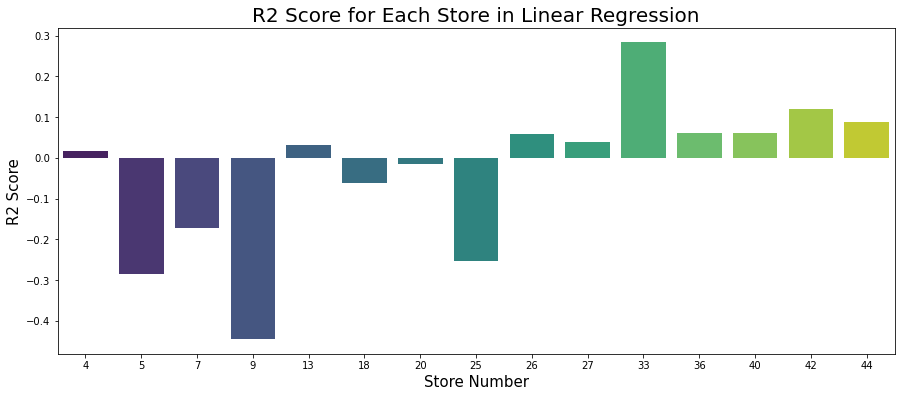

In [134]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df['Store Number'], y = store_r2_df['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Linear Regression', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [135]:
best_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax()]
worst_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmin()]
med_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax() - (store_r2_df['R2_Score'].idxmax() - store_r2_df['R2_Score'].idxmin()) // 2]

In [136]:
print('Best Store:', best_store)
print('Worst Store:', worst_store)
print('Medium Store:', med_store)


# Get the values of the best, worst and median stores
best_store_val = best_store['R2_Score']
worst_store_val = worst_store['R2_Score']
med_store_val = med_store['R2_Score']

Best Store: Store Number    33.000000
R2_Score         0.283077
Name: 10, dtype: float64
Worst Store: Store Number    9.000000
R2_Score       -0.444607
Name: 3, dtype: float64
Medium Store: Store Number    25.000000
R2_Score        -0.253672
Name: 7, dtype: float64


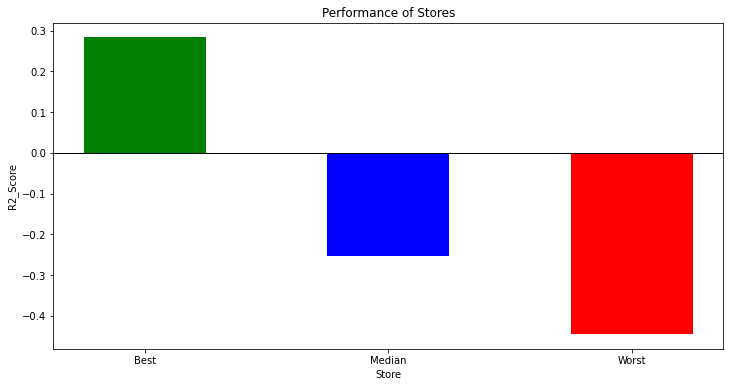

In [137]:
plt.figure(figsize=(12,6))
plt.bar([1, 2, 3], [best_store_val, med_store_val, worst_store_val], color=['g', 'b', 'r'], width=0.5)
plt.xticks([1, 2, 3], ['Best', 'Median', 'Worst'])
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Store')
plt.ylabel('R2_Score')
plt.title('Performance of Stores')
plt.show()

In [47]:
#Random forest

In [48]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [10, 20, 30], 
              'max_features': ['sqrt', 'log2']}

In [49]:
# Create a Random Forest regressor object
rf = RandomForestRegressor(random_state=42)

In [50]:
from sklearn.metrics import make_scorer, mean_squared_error

In [51]:
# Create a scorer object for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=kf, scoring=mse_scorer, n_jobs=-1)

In [53]:
# Fit the GridSearchCV object on the training data
grid_search.fit(train.drop(['Weekly_Sales', 'Date'], axis=1), train['Weekly_Sales'])

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [54]:
# Print the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}


In [55]:
 #Make predictions on the testing set using the best estimator
y_pred1 = grid_search.best_estimator_.predict(test.drop(['Weekly_Sales', 'Date'], axis=1))


In [56]:
# Compute the mean squared error on the testing set
mse = mean_squared_error(test['Weekly_Sales'], y_pred1)


In [57]:
# Print the mean squared error on the testing set
print(f"Mean squared error on testing set: {mse:.2f}")

Mean squared error on testing set: 159106492.12


In [60]:
# Calculate R-squared score on the training set
train_r2 = grid_search.best_estimator_.score(train.drop(['Weekly_Sales', 'Date'], axis=1), train['Weekly_Sales'])

# Calculate R-squared score on the testing set
test_r2 = grid_search.best_estimator_.score(test.drop(['Weekly_Sales', 'Date'], axis=1), test['Weekly_Sales'])

# Print the R-squared scores
print(f"R-squared score on training set: {train_r2:.3f}")
print(f"R-squared score on testing set: {test_r2:.3f}")


R-squared score on training set: 0.886
R-squared score on testing set: 0.718


In [208]:
mae = mean_absolute_error(test['Weekly_Sales'], y_pred1)
mse = mean_squared_error(test['Weekly_Sales'], y_pred1)
rmse1 = np.sqrt(mse)

In [209]:
# Print the evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 7874.43
MSE: 159106492.12
RMSE: 11312.88


In [210]:
normalised_rmse = rmse1/(test['Weekly_Sales'].max() - test['Weekly_Sales'].min())
print('Normalised RMSE: ', normalised_rmse)

Normalised RMSE:  0.029805329680587953


In [61]:
rf_df = pd.DataFrame({'Actual': test['Weekly_Sales'], 'Predicted': y_pred1})
rf_df.head(100)

,Actual,Predicted
29518,38724.42,42005.889581
29519,69872.44,53494.069632
29520,49937.09,48113.692379
29521,30107.54,41454.255734
29522,31580.69,40855.904022
...,...,...
29613,41861.00,42826.375663
29614,52520.88,45920.453675
29615,73671.92,52770.623030
29616,91965.85,59847.930125


In [138]:
store_r2 = []
for store_number in test['Store'].unique():
    store_array = (test['Store'] == store_number)
    X_Store = test.drop(['Weekly_Sales', 'Date'], axis=1)[store_array]
    y_Store = test['Weekly_Sales'][store_array]
    temp_array = [store_number, rf.score(X_Store, y_Store)]
    store_r2.append(temp_array)


In [139]:
store_r2_df = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])
store_r2_df

,Store Number,R2_Score
0,4,0.996059
1,5,0.986842
2,7,0.990189
3,9,0.972823
4,13,0.993781
5,18,0.990888
6,20,0.992357
7,25,0.991241
8,26,0.996110
9,27,0.994699


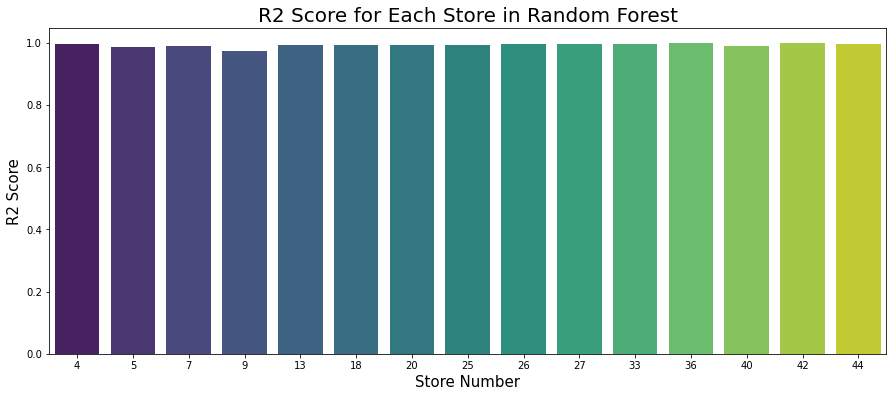

In [140]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df['Store Number'], y = store_r2_df['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Random Forest', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [141]:
best_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax()]
worst_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmin()]
med_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax() - (store_r2_df['R2_Score'].idxmax() - store_r2_df['R2_Score'].idxmin()) // 2]

In [142]:
print('Best Store:', best_store)
print('Worst Store:', worst_store)
print('Medium Store:', med_store)


# Get the values of the best, worst and median stores
best_store_val = best_store['R2_Score']
worst_store_val = worst_store['R2_Score']
med_store_val = med_store['R2_Score']

Best Store: Store Number    42.00000
R2_Score         0.99822
Name: 13, dtype: float64
Worst Store: Store Number    9.000000
R2_Score        0.972823
Name: 3, dtype: float64
Medium Store: Store Number    26.00000
R2_Score         0.99611
Name: 8, dtype: float64


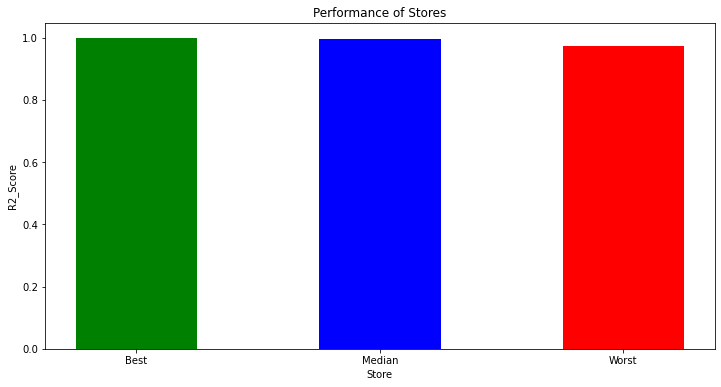

In [143]:
plt.figure(figsize=(12,6))
plt.bar([1, 2, 3], [best_store_val, med_store_val, worst_store_val], color=['g', 'b', 'r'], width=0.5)
plt.xticks([1, 2, 3], ['Best', 'Median', 'Worst'])
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Store')
plt.ylabel('R2_Score')
plt.title('Performance of Stores')
plt.show()

In [68]:
#Decision Tree

In [69]:
# Define the hyperparameters to tune
param_grid = {'max_depth': [2, 5, 10, 20, 50],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 2, 5, 10]}

# Create a DecisionTreeRegressor object
dt = DecisionTreeRegressor(random_state=42)

# Create a scorer object for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=kf, scoring=mse_scorer, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(train.drop(['Weekly_Sales', 'Date'], axis=1), train['Weekly_Sales'])

# Print the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")

# Make predictions on the testing set using the best estimator
y_pred2 = grid_search.best_estimator_.predict(test.drop(['Weekly_Sales', 'Date'], axis=1))

# Compute the mean squared error on the testing set
mse = mean_squared_error(test['Weekly_Sales'], y_pred2)

# Print the mean squared error on the testing set
print(f"Mean squared error on testing set: {mse:.2f}")

# Calculate R-squared score on the training set
train_r2 = grid_search.best_estimator_.score(train.drop(['Weekly_Sales', 'Date'], axis=1), train['Weekly_Sales'])

# Calculate R-squared score on the testing set
test_r2 = grid_search.best_estimator_.score(test.drop(['Weekly_Sales', 'Date'], axis=1), test['Weekly_Sales'])

# Print the R-squared scores
print(f"R-squared score on training set: {train_r2:.3f}")
print(f"R-squared score on testing set: {test_r2:.3f}")


Best hyperparameters: {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean squared error on testing set: 153870652.34
R-squared score on training set: 0.996
R-squared score on testing set: 0.727


In [211]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test['Weekly_Sales'], y_pred2)
mse = mean_squared_error(test['Weekly_Sales'], y_pred2)
rmse2 = np.sqrt(mse)

In [212]:
# Print the evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 6270.39
MSE: 153870652.34
RMSE: 11312.88


In [213]:
normalised_rmse = rmse2/(test['Weekly_Sales'].max() - test['Weekly_Sales'].min())
print('Normalised RMSE: ', normalised_rmse)

Normalised RMSE:  0.029310813833750827


In [72]:
dt_df = pd.DataFrame({'Actual': test['Weekly_Sales'], 'Predicted': y_pred2})
dt_df.head(100)

,Actual,Predicted
29518,38724.42,36959.182500
29519,69872.44,60100.480000
29520,49937.09,52342.302500
29521,30107.54,28012.755000
29522,31580.69,30330.215000
...,...,...
29613,41861.00,39505.825000
29614,52520.88,55063.000000
29615,73671.92,97636.280000
29616,91965.85,97636.280000


In [162]:
store_r2 = []
for store_number in test['Store'].unique():
    store_array = (test['Store'] == store_number)
    X_Store = test.drop(['Weekly_Sales', 'Date'], axis=1)[store_array]
    y_Store = test['Weekly_Sales'][store_array]
    temp_array = [store_number, dt.score(X_Store, y_Store)]
    store_r2.append(temp_array)

In [163]:
store_r2_df = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])
store_r2_df

,Store Number,R2_Score
0,4,0.995415
1,5,0.989955
2,7,0.991461
3,9,0.979715
4,13,0.990162
5,18,0.989330
6,20,0.991832
7,25,0.991479
8,26,0.995503
9,27,0.994926


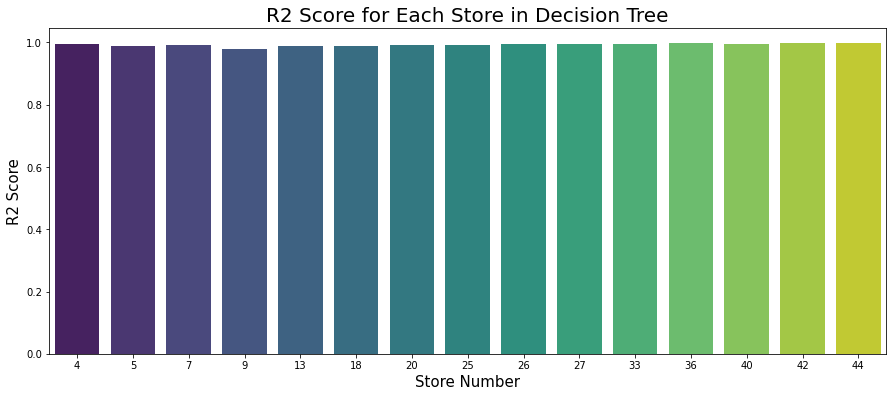

In [164]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df['Store Number'], y = store_r2_df['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Decision Tree', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [165]:
best_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax()]
worst_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmin()]
med_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax() - (store_r2_df['R2_Score'].idxmax() - store_r2_df['R2_Score'].idxmin()) // 2]

In [166]:
print('Best Store:', best_store)
print('Worst Store:', worst_store)
print('Medium Store:', med_store)


# Get the values of the best, worst and median stores
best_store_val = best_store['R2_Score']
worst_store_val = worst_store['R2_Score']
med_store_val = med_store['R2_Score']

Best Store: Store Number    42.000000
R2_Score         0.997731
Name: 13, dtype: float64
Worst Store: Store Number    9.000000
R2_Score        0.979715
Name: 3, dtype: float64
Medium Store: Store Number    26.000000
R2_Score         0.995503
Name: 8, dtype: float64


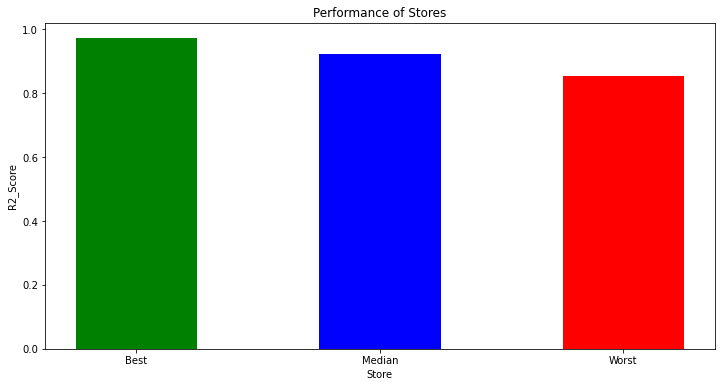

In [161]:
plt.figure(figsize=(12,6))
plt.bar([1, 2, 3], [best_store_val, med_store_val, worst_store_val], color=['g', 'b', 'r'], width=0.5)
plt.xticks([1, 2, 3], ['Best', 'Median', 'Worst'])
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Store')
plt.ylabel('R2_Score')
plt.title('Performance of Stores')
plt.show()

In [79]:
#Xgboost

In [87]:
# Import required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from xgboost import XGBRegressor

# Define the hyperparameters to tune
param_grid = {'max_depth': [2, 5, 10],
              'subsample': [0.6, 0.8, 1.0],
              'learning_rate': [0.1, 0.01, 0.001],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'gamma' : [0, 1, 2]}

"""
# Define the hyperparameters to tune
param_grid = {'max_depth': [2, 5, 10, 20, 50],
              'min_child_weight': [1, 2, 5, 10],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'learning_rate': [0.01, 0.1, 0.2],
              'n_estimators': [100, 500, 1000]}"""

# Create an XGBRegressor object
xgb = XGBRegressor(random_state=42)

# Create a scorer object for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create a KFold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=kf, scoring=mse_scorer, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(train.drop(['Weekly_Sales', 'Date'], axis=1), train['Weekly_Sales'])

# Print the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")

# Make predictions on the testing set using the best estimator
y_pred3 = grid_search.best_estimator_.predict(test.drop(['Weekly_Sales', 'Date'], axis=1))

# Compute the mean squared error on the testing set
mse = mean_squared_error(test['Weekly_Sales'], y_pred2)

# Print the mean squared error on the testing set
print(f"Mean squared error on testing set: {mse:.2f}")

# Calculate R-squared score on the training set
train_r2 = grid_search.best_estimator_.score(train.drop(['Weekly_Sales', 'Date'], axis=1), train['Weekly_Sales'])

# Calculate R-squared score on the testing set
test_r2 = grid_search.best_estimator_.score(test.drop(['Weekly_Sales', 'Date'], axis=1), test['Weekly_Sales'])

# Print the R-squared scores
print(f"R-squared score on training set: {train_r2:.3f}")
print(f"R-squared score on testing set: {test_r2:.3f}")

Best hyperparameters: {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.1, 'max_depth': 10, 'subsample': 0.8}
Mean squared error on testing set: 153870652.34
R-squared score on training set: 0.985
R-squared score on testing set: 0.773


In [214]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(test['Weekly_Sales'], y_pred3)
mse = mean_squared_error(test['Weekly_Sales'], y_pred3)
rmse3 = np.sqrt(mse)

In [215]:
# Print the evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 6126.28
MSE: 127981266.76
RMSE: 11312.88


In [216]:
normalised_rmse = rmse3/(test['Weekly_Sales'].max() - test['Weekly_Sales'].min())
print('Normalised RMSE: ', normalised_rmse)

Normalised RMSE:  0.026731490925801158


In [167]:
xgbr_df = pd.DataFrame({'Actual': test['Weekly_Sales'], 'Predicted': y_pred3})
xgbr_df.head(100)

,Actual,Predicted
29518,38724.42,39617.835938
29519,69872.44,53336.992188
29520,49937.09,45424.484375
29521,30107.54,30762.705078
29522,31580.69,34580.000000
...,...,...
29613,41861.00,48955.699219
29614,52520.88,64513.472656
29615,73671.92,87775.640625
29616,91965.85,105240.531250


In [168]:
store_r2 = []
for store_number in test['Store'].unique():
    store_array = (test['Store'] == store_number)
    X_Store = test.drop(['Weekly_Sales', 'Date'], axis=1)[store_array]
    y_Store = test['Weekly_Sales'][store_array]
    temp_array = [store_number, xgb.score(X_Store, y_Store)]
    store_r2.append(temp_array)

In [169]:
store_r2_df = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])
store_r2_df

,Store Number,R2_Score
0,4,0.971853
1,5,0.921234
2,7,0.853506
3,9,0.878124
4,13,0.969605
5,18,0.919269
6,20,0.951455
7,25,0.913547
8,26,0.928958
9,27,0.961513


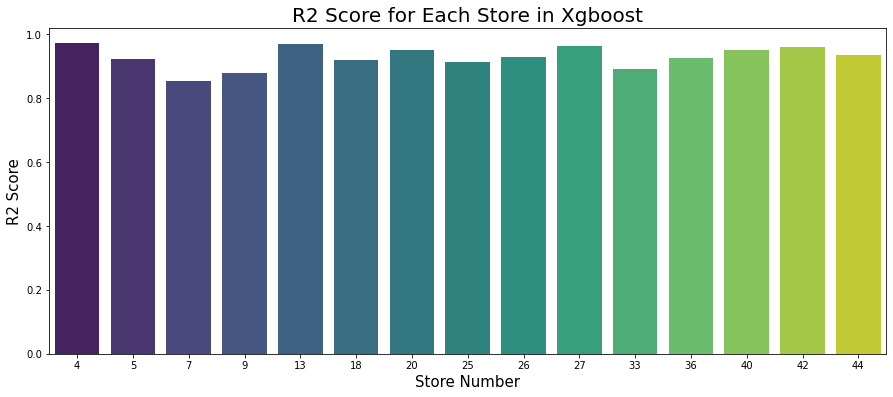

In [170]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df['Store Number'], y = store_r2_df['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Xgboost', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [171]:
best_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax()]
worst_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmin()]
med_store = store_r2_df.iloc[store_r2_df['R2_Score'].idxmax() - (store_r2_df['R2_Score'].idxmax() - store_r2_df['R2_Score'].idxmin()) // 2]

In [172]:
print('Best Store:', best_store)
print('Worst Store:', worst_store)
print('Medium Store:', med_store)


# Get the values of the best, worst and median stores
best_store_val = best_store['R2_Score']
worst_store_val = worst_store['R2_Score']
med_store_val = med_store['R2_Score']

Best Store: Store Number    4.000000
R2_Score        0.971853
Name: 0, dtype: float64
Worst Store: Store Number    7.000000
R2_Score        0.853506
Name: 2, dtype: float64
Medium Store: Store Number    5.000000
R2_Score        0.921234
Name: 1, dtype: float64


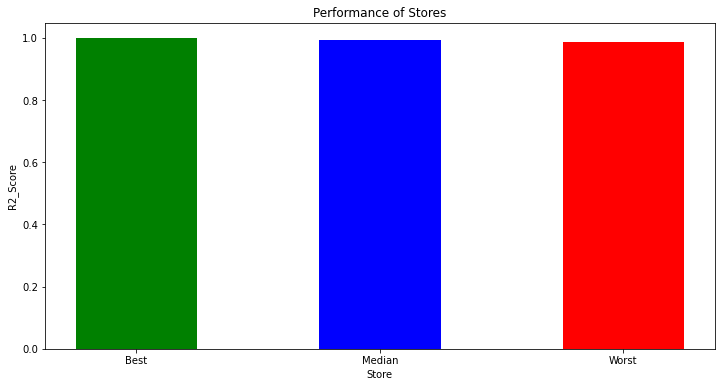

In [94]:
plt.figure(figsize=(12,6))
plt.bar([1, 2, 3], [best_store_val, med_store_val, worst_store_val], color=['g', 'b', 'r'], width=0.5)
plt.xticks([1, 2, 3], ['Best', 'Median', 'Worst'])
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Store')
plt.ylabel('R2_Score')
plt.title('Performance of Stores')
plt.show()

In [95]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model","Train_r2","Test_r2"]
x.add_row(["Linear Regression", 0.06, 0.12 ])
x.add_row(["DecisionTreeRegressor",0.996, 0.727])
x.add_row(["RandomForestRegressor",0.886, 0.718 ])
x.add_row(["XGBoost", 0.985, 0.773  ])
print(x)



+-----------------------+----------+---------+
|         Model         | Train_r2 | Test_r2 |
+-----------------------+----------+---------+
|   Linear Regression   |   0.06   |   0.12  |
| DecisionTreeRegressor |  0.996   |  0.727  |
| RandomForestRegressor |  0.886   |  0.718  |
|        XGBoost        |  0.985   |  0.773  |
+-----------------------+----------+---------+


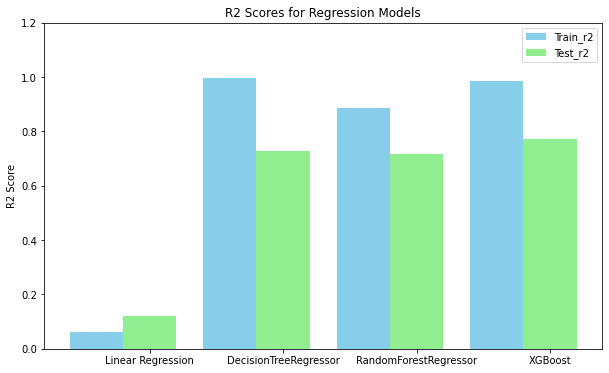

In [187]:
import matplotlib.pyplot as plt

# Data
model_names = ["Linear Regression", "DecisionTreeRegressor", "RandomForestRegressor", "XGBoost"]
train_r2 = [0.06, 0.996, 0.886, 0.985]
test_r2 = [0.12, 0.727, 0.718, 0.773]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bar_width = 0.4
train_bars = ax.bar(range(len(train_r2)), train_r2, width=bar_width, color='#87CEEB', label='Train_r2')
test_bars = ax.bar([x + bar_width for x in range(len(test_r2))], test_r2, width=bar_width, color='#90EE90', label='Test_r2')

# Set the x-axis labels and tick marks
ax.set_xticks([i + bar_width for i in range(len(model_names))])
ax.set_xticklabels(model_names)

# Set the y-axis label and limits
ax.set_ylabel('R2 Score')
ax.set_ylim([0, 1.2])

# Add a title and legend
ax.set_title('R2 Scores for Regression Models')
ax.legend()

# Display the plot
plt.show()


**Finding the r2 score based on the 45 stores and comparing the models to the above models.**

In [96]:
#Linear Regression

In [97]:
X = df1.drop(['Weekly_Sales','Date'], axis=1)
y = df1['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
lr = LinearRegression()

In [99]:
# Fitting the model on the training data
lr.fit(X_train, y_train)

# Predicting the target variable for the testing set
y_pred_lr = lr.predict(X_test)

In [100]:
# Calculate the R-squared score for the training set
y_train_pred_lr = lr.predict(X_train)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

# Calculate the R-squared score for the testing set
r2_test_lr = r2_score(y_test, y_pred_lr)

print("R-squared score for training set:", r2_train_lr)
print("R-squared score for testing set:", r2_test_lr)


R-squared score for training set: 0.08683627261966176
R-squared score for testing set: 0.08879604408433428


In [101]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)


Mean Absolute Error: 14559.425906641174
Mean Squared Error: 475166431.60548425
Root Mean Squared Error: 21798.31258619539


In [102]:
store_r2 = []
for store_number in range(1, X_test['Store'].nunique() + 1):
    store_array = (X_test['Store'] == store_number)
    X_Store = X_test[store_array]
    y_Store = y_test[store_array]
    temp_array = [store_number, lr.score(X_Store, y_Store)]
    store_r2.append(temp_array)

In [103]:
store_r2_df1 = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])
store_r2_df1

,Store Number,R2_Score
0,1,0.046713
1,2,0.035779
2,3,-0.121076
3,4,0.018173
4,5,-0.301218
5,6,0.031893
6,7,-0.213910
7,8,-0.015942
8,9,-0.435391
9,10,-0.130932


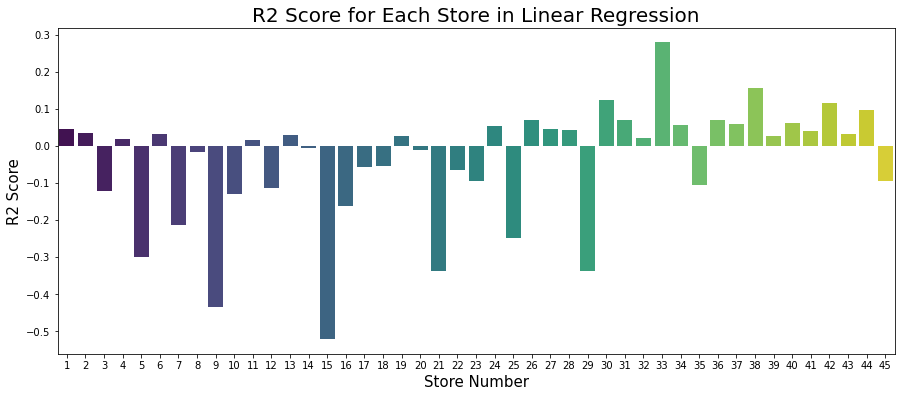

In [104]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df1['Store Number'], y = store_r2_df1['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Linear Regression', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [105]:
#Decison Tree

In [106]:
dt = DecisionTreeRegressor(random_state=42)
dt

DecisionTreeRegressor(random_state=42)

In [107]:
# Fitting the model on the training data
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [108]:
y_pred_dt = dt.predict(X_test)

In [109]:
# Calculate the R-squared score for the training set
y_train_pred_dt = dt.predict(X_train)
r2_train_dt = r2_score(y_train, y_train_pred_dt)

# Calculate the R-squared score for the testing set
r2_test_dt = r2_score(y_test, y_pred_dt)

print("R-squared score for training set:", r2_train_dt)
print("R-squared score for testing set:", r2_test_dt)

R-squared score for training set: 1.0
R-squared score for testing set: 0.9632401597954815


In [110]:
store_r2 = []
for store_number in range(1, X_test['Store'].nunique() + 1):
    store_array = (X_test['Store'] == store_number)
    X_Store = X_test[store_array]
    y_Store = y_test[store_array]
    temp_array = [store_number, dt.score(X_Store, y_Store)]
    store_r2.append(temp_array)
    

In [111]:
store_r2_df2 = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])
store_r2_df2

,Store Number,R2_Score
0,1,0.974049
1,2,0.973509
2,3,0.972190
3,4,0.976893
4,5,0.947973
5,6,0.961954
6,7,0.953779
7,8,0.966033
8,9,0.899837
9,10,0.897609


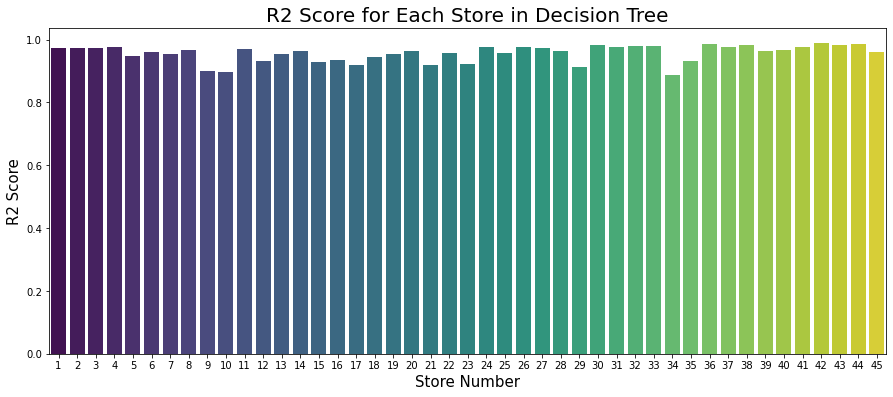

In [112]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df2['Store Number'], y = store_r2_df2['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Decision Tree', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [113]:
#Random Forest

In [114]:
# Create a Random Forest regressor object
rf = RandomForestRegressor(random_state=42)
rf

RandomForestRegressor(random_state=42)

In [115]:
# Fitting the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [116]:
y_pred_rf = rf.predict(X_test)

In [117]:
# Calculate the R-squared score for the training set
y_train_pred_rf = rf.predict(X_train)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Calculate the R-squared score for the testing set
r2_test_rf = r2_score(y_test, y_pred_rf)

print("R-squared score for training set:", r2_train_rf)
print("R-squared score for testing set:", r2_test_rf)


R-squared score for training set: 0.9970780301143053
R-squared score for testing set: 0.9786462353462199


In [118]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)


Mean Absolute Error: 1305.2467130369807
Mean Squared Error: 11135368.855684718
Root Mean Squared Error: 3336.9700112054825


In [119]:
store_r2 = []
for store_number in range(1, X_test['Store'].nunique() + 1):
    store_array = (X_test['Store'] == store_number)
    X_Store = X_test[store_array]
    y_Store = y_test[store_array]
    temp_array = [store_number, rf.score(X_Store, y_Store)]
    store_r2.append(temp_array)
    

In [120]:
store_r2_df3 = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])
store_r2_df3

,Store Number,R2_Score
0,1,0.987154
1,2,0.985633
2,3,0.980684
3,4,0.988391
4,5,0.956225
5,6,0.983395
6,7,0.967249
7,8,0.980471
8,9,0.891405
9,10,0.931269


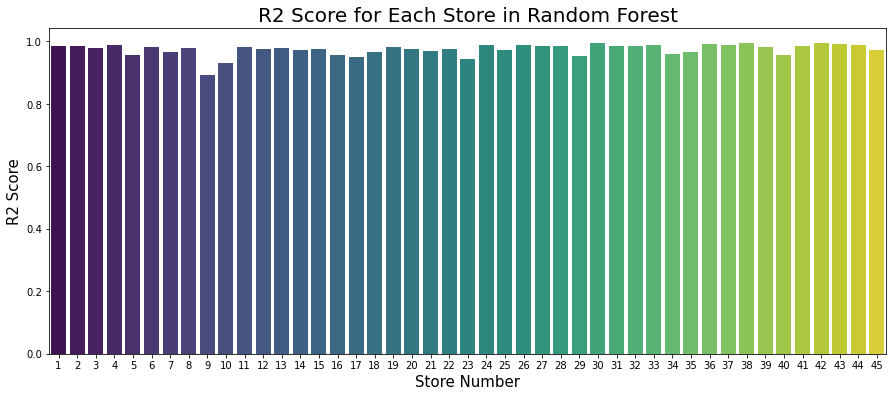

In [131]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df3['Store Number'], y = store_r2_df3['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Random Forest', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [122]:
#Xgboost

In [123]:
# Creating an instance of the XGBRegressor model
xgb = XGBRegressor(random_state=42)

In [124]:
# Fitting the model on the training data
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [125]:
# Predicting the target variable for the testing set
y_pred_xgb = xgb.predict(X_test)

In [126]:
# Calculate the R-squared score for the training set
y_train_pred_xgb = xgb.predict(X_train)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

# Calculate the R-squared score for the testing set
r2_test_xgb = r2_score(y_test, y_pred_xgb)

print("R-squared score for training set:", r2_train_xgb)
print("R-squared score for testing set:", r2_test_xgb)


R-squared score for training set: 0.9516705001631839
R-squared score for testing set: 0.9490866580247047


In [127]:
store_r2 = []
for store_number in range(1, X_test['Store'].nunique() + 1):
    store_array = (X_test['Store'] == store_number)
    X_Store = X_test[store_array]
    y_Store = y_test[store_array]
    temp_array = [store_number, xgb.score(X_Store, y_Store)]
    store_r2.append(temp_array)

In [128]:
store_r2_df4 = pd.DataFrame(store_r2, columns = ['Store Number', 'R2_Score'])
store_r2_df4

,Store Number,R2_Score
0,1,0.975618
1,2,0.969129
2,3,0.956683
3,4,0.971525
4,5,0.916296
5,6,0.949832
6,7,0.839000
7,8,0.954402
8,9,0.836381
9,10,0.884783


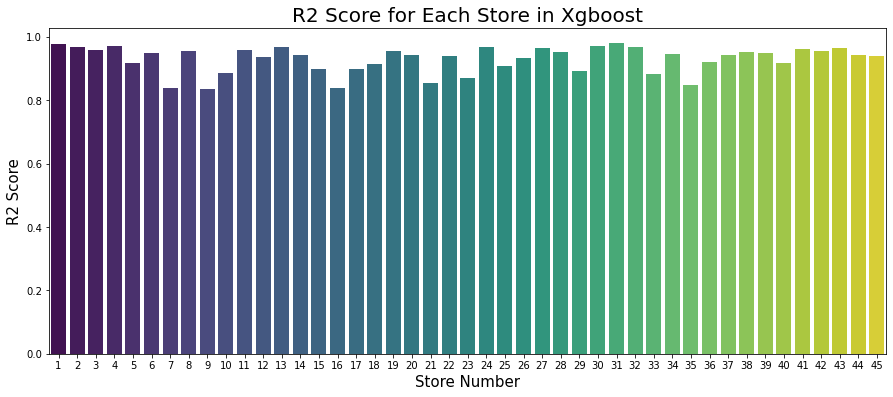

In [227]:
plt.figure(figsize=(15,6))
sns.barplot(x = store_r2_df4['Store Number'], y = store_r2_df4['R2_Score'], palette = 'viridis')
plt.title('R2 Score for Each Store in Xgboost', fontsize = 20)
plt.xlabel('Store Number', fontsize = 15)
plt.ylabel('R2 Score', fontsize = 15)
plt.show()

In [217]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model","Train_r2","Test_r2"]
x.add_row(["Linear Regression", 0.086, 0.088 ])
x.add_row(["DecisionTreeRegressor", 1.0, 0.963])
x.add_row(["RandomForestRegressor",0.997, 0.978 ])
x.add_row(["XGBoost", 0.949, 0.944  ])
print(x)


+-----------------------+----------+---------+
|         Model         | Train_r2 | Test_r2 |
+-----------------------+----------+---------+
|   Linear Regression   |  0.086   |  0.088  |
| DecisionTreeRegressor |   1.0    |  0.963  |
| RandomForestRegressor |  0.997   |  0.978  |
|        XGBoost        |  0.949   |  0.944  |
+-----------------------+----------+---------+


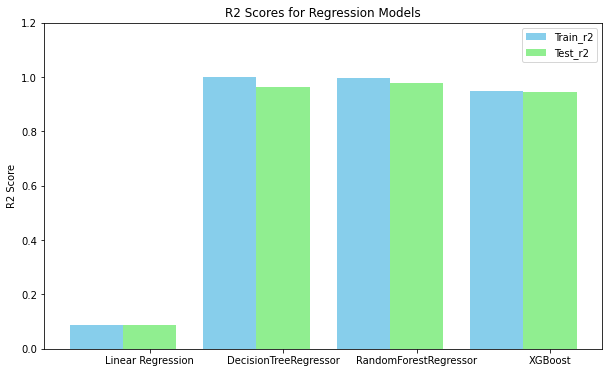

In [222]:
import matplotlib.pyplot as plt

# Data
model_names = ["Linear Regression", "DecisionTreeRegressor", "RandomForestRegressor", "XGBoost"]
train_r2 = [0.086, 1.0, 0.997, 0.949]
test_r2 = [0.088, 0.963, 0.978, 0.944]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
bar_width = 0.4
train_bars = ax.bar(range(len(train_r2)), train_r2, width=bar_width, color='#87CEEB', label='Train_r2')
test_bars = ax.bar([x + bar_width for x in range(len(test_r2))], test_r2, width=bar_width, color='#90EE90', label='Test_r2')

# Set the x-axis labels and tick marks
ax.set_xticks([i + bar_width for i in range(len(model_names))])
ax.set_xticklabels(model_names)

# Set the y-axis label and limits
ax.set_ylabel('R2 Score')
ax.set_ylim([0, 1.2])

# Add a title and legend
ax.set_title('R2 Scores for Regression Models')
ax.legend()

# Display the plot
plt.show()
